In [0]:
import pandas as pd
import io
import requests

'''
places = [
  'Snohomish County, WA',
  'Sacramento County, CA',
  'Santa Clara County, CA',
  'Orange County, CA',
  'San Diego County, CA',
  'Maricopa County, AZ',
  'Cook County, IL',
  'Suffolk County, MA',
  'New York County, NY',
  'Miami',
  'Denver',
  'Kansas City',
  'Dallas',
  'Nashville'
]
'''

# Testing out a fixed list of cities
places = [
  'Anhui',
  'Heilongjiang',
  'Hubei',
  'Jiangxi',
  'Jiangsu',
  'Jilin',
  'Liaoning',
  'Shaanxi',
  'Shandong',
  'Tokyo',
  'Pyong Yang',
  'Hong Kong',
  'Singapore',
  'Taipei'
]

# Read updated dataset from source
url = "https://raw.githubusercontent.com/RamiKrispin/coronavirus-csv/master/coronavirus_dataset.csv"
s = requests.get(url).content
dataset = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Group by country, get timeseries by day with cases
list = dataset.groupby('Province.State').apply(lambda x: [list(x['date']), list(x['cases'])]).apply(list)

In [0]:
import numpy as np
from datetime import datetime

# Get cities
db_dict = list.to_dict()
dim = len(db_dict)

# Start Adjances Matrix
graphs = dict()
dates = []

## Sorting the dates for which cases have been found

In [0]:
# Getting dates
for key in db_dict:
  value = db_dict[key]
  k_dates = value[0]

  # Save all unique dates
  for date in k_dates:
    if date not in dates:
      dates.append(date)
    
# Chronological sort
dates.sort(key=lambda date: datetime.strptime(date, "%Y-%m-%d"))

In [0]:
columns = dict()

for location in places:

  if location in db_dict:
    columns[location] = db_dict[location]
  
  else:
    columns[location] = [[], []]

## Generate cases progression table

In [0]:
# heading
row = ""

x = 0
for city in columns.keys():
  row += str(x)

  if x < len(columns.keys()) - 1:
    row += ", "

  x += 1

row += "\n"

# Save
with open("ds-cases.csv", "a") as d_file:
  d_file.write(row)

# data
for g in range(int(len(dates) / 2)):
  date = dates[g]
  row = ""

  # All cities for that day
  x = 0
  for place in columns.keys():
    record = columns[place]

    # There is a case for that day
    if date in record[0]:
      index = record[0].index(date)
      case = record[1][index]

      if case > 0:
        row += str(case)

      else:
        row += "0"

    else:
      row += "0"

    if x < len(columns.keys()) - 1:
      row += ","

    x += 1

  row += "\n"

  # Save
  with open("ds-cases.csv", "a") as d_file:
    d_file.write(row)

# Generating the adjacency Matrix




In [0]:
# Fixed adjacency matrix based on airport connections 
adj_matrix = [

  #Snohomish County, WA              
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  
  # Sacramento County, CA
  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],

  # Santa Clara County, CA
  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

  # Orange County, CA
  [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],

  # San Diego County, CA
  [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],

  # Maricopa County, AZ
  [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],

  # Cook County, IL
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],

  # Suffolk County, MA
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],

  # New York County, NY
  [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1],

  # Miami
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],

  # Denver
  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],

  # Kansas City
  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1],

  # Dallas
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],

  # Nashville
  [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0],

]

'''
from random import *

adj_matrix = []

# Random Adjacency Matrix
for i in range(len(columns.keys())):
  adj_matrix.append(np.random.randint(2, size=len(columns.keys())))
'''

'\nfrom random import *\n\nadj_matrix = []\n\n# Random Adjacency Matrix\nfor i in range(len(columns.keys())):\n  adj_matrix.append(np.random.randint(2, size=len(columns.keys())))\n'

In [0]:
# Data
for i in range(len(adj_matrix)):
  row = ""

  x = 0

  # Comma separated adjances
  for j in range(len(adj_matrix[i])):

    row += str(adj_matrix[i][j])

    if x < len(adj_matrix[i]) - 1:
      row += ", "

    x += 1

  row += "\n"

  with open("ds-matrix.csv", "a") as d_file:
    d_file.write(row)

## Testing the GCN

In [0]:
# -*- coding: utf-8 -*-
import pickle as pkl
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import os
import numpy.linalg as la
from input_data import preprocess_data,load_sz_data,load_los_data
from tgcn import tgcnCell
#from gru import GRUCell 

from visualization import plot_result,plot_error
from sklearn.metrics import mean_squared_error,mean_absolute_error
#import matplotlib.pyplot as plt
import time

time_start = time.time()

###### Settings ######

model_name = 'tgcn'
data_name = 'los'
train_rate =  0.7

batch_size = 8
lr = 0.001
training_epoch = 500
gru_units = 64

###### load data ######
data, adj = load_sz_data('sz')

time_len = data.shape[0]
num_nodes = data.shape[1]
data1 =np.mat(data,dtype=np.float32)

In [0]:
# time length of inputs (12)
seq_len = int((time_len * (1 - train_rate)) * (2/3))

# time length of prediction
output_dim = pre_len = int((time_len * (1 - train_rate)) * (1/3))

seq_len = 4
output_dim = pre_len = 1

seq_len, pre_len

(4, 1)

In [0]:
#### normalization
max_value = np.max(data1)
data1  = data1/max_value
trainX, trainY, testX, testY = preprocess_data(data1, time_len, train_rate, seq_len, pre_len)

In [0]:
def TGCN(_X, _weights, _biases):
    ###
    cell_1 = tgcnCell(gru_units, adj, num_nodes=num_nodes)
    cell = tf.nn.rnn_cell.MultiRNNCell([cell_1], state_is_tuple=True)
    _X = tf.unstack(_X, axis=1)
    outputs, states = tf.nn.static_rnn(cell, _X, dtype=tf.float32)
    m = []
    for i in outputs:
        o = tf.reshape(i,shape=[-1,num_nodes,gru_units])
        o = tf.reshape(o,shape=[-1,gru_units])
        m.append(o)
    last_output = m[-1]
    output = tf.matmul(last_output, _weights['out']) + _biases['out']
    output = tf.reshape(output,shape=[-1,num_nodes,pre_len])
    output = tf.transpose(output, perm=[0,2,1])
    output = tf.reshape(output, shape=[-1,num_nodes])
    return output, m, states

def evaluation(a,b):
    rmse = math.sqrt(mean_squared_error(a,b))
    mae = mean_absolute_error(a, b)
    F_norm = la.norm(a-b,'fro')/la.norm(a,'fro')
    r2 = 1-((a-b)**2).sum()/((a-a.mean())**2).sum()
    var = 1-(np.var(a-b))/np.var(a)
    return rmse, mae, 1-F_norm, r2, var


In [0]:
totalbatch = int(trainX.shape[0]/batch_size)
training_data_count = len(trainX)


Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Iter:0 train_rmse:1.146e+04 test_loss:11.06 test_rmse:0.7151 test_acc:-3.606
Iter:1 train_rmse:1.059e+04 test_loss:9.353 test_rmse:0.6559 test_acc:-3.225
Iter:2 train_rmse:9.694e+03 test_loss:7.765 test_rmse:0.5955 test_acc:-2.836
Iter:3 train_rmse:8.778e+03 test_loss

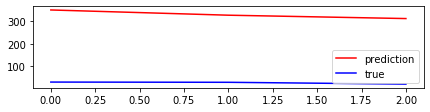

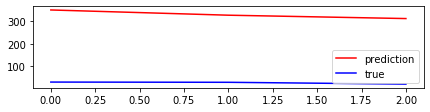

min_rmse:2161.5614864902072 min_mae:614.23303 max_acc:0.061753809452056885 r2:0.09187686443328857 var:0.09356886148452759


In [0]:
###### placeholders ######
inputs = tf.placeholder(tf.float32, shape=[None, seq_len, num_nodes])
labels = tf.placeholder(tf.float32, shape=[None, pre_len, num_nodes])

# Graph weights
weights = {
    'out': tf.Variable(tf.random_normal([gru_units, pre_len], mean=1.0), name='weight_o')}
biases = {
    'out': tf.Variable(tf.random_normal([pre_len]),name='bias_o')}

if model_name == 'tgcn':
    pred,ttts,ttto = TGCN(inputs, weights, biases)

y_pred = pred
      

###### optimizer ######
lambda_loss = 0.0015
Lreg = lambda_loss * sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())
label = tf.reshape(labels, [-1,num_nodes])
##loss
loss = tf.reduce_mean(tf.nn.l2_loss(y_pred-label) + Lreg)
##rmse
error = tf.sqrt(tf.reduce_mean(tf.square(y_pred-label)))
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)

###### Initialize session ######
variables = tf.global_variables()
saver = tf.train.Saver(tf.global_variables())  
#sess = tf.Session()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

out = 'out/%s'%(model_name)
#out = 'out/%s_%s'%(model_name,'perturbation')
path1 = '%s_%s_lr%r_batch%r_unit%r_seq%r_pre%r_epoch%r'%(model_name,data_name,lr,batch_size,gru_units,seq_len,pre_len,training_epoch)
path = os.path.join(out,path1)
if not os.path.exists(path):
    os.makedirs(path)
    
###### evaluation ######
   
x_axe,batch_loss,batch_rmse,batch_pred = [], [], [], []
test_loss,test_rmse,test_mae,test_acc,test_r2,test_var,test_pred = [],[],[],[],[],[],[]
  
for epoch in range(training_epoch):

    for m in range(totalbatch):
        mini_batch = trainX[m * batch_size : (m+1) * batch_size]
        mini_label = trainY[m * batch_size : (m+1) * batch_size]

        _, loss1, rmse1, train_output = sess.run([optimizer, loss, error, y_pred],
                                                 feed_dict = {inputs:mini_batch, labels:mini_label})
        batch_loss.append(loss1)
        batch_rmse.append(rmse1 * max_value)

     # Test completely at every epoch
    loss2, rmse2, test_output = sess.run([loss, error, y_pred],
                                         feed_dict = {inputs:testX, labels:testY})
    test_label = np.reshape(testY,[-1,num_nodes])
    rmse, mae, acc, r2_score, var_score = evaluation(test_label, test_output)
    test_label1 = test_label * max_value
    test_output1 = test_output * max_value
    test_loss.append(loss2)
    test_rmse.append(rmse * max_value)
    test_mae.append(mae * max_value)
    test_acc.append(acc)
    test_r2.append(r2_score)
    test_var.append(var_score)
    test_pred.append(test_output1)

    print('Iter:{}'.format(epoch),
          'train_rmse:{:.4}'.format(batch_rmse[-1]),
          'test_loss:{:.4}'.format(loss2),
          'test_rmse:{:.4}'.format(rmse),
          'test_acc:{:.4}'.format(acc))
    
    if (epoch % 500 == 0):        
        saver.save(sess, path+'/model_100/TGCN_pre_%r'%epoch, global_step = epoch)
        
time_end = time.time()
print(time_end-time_start,'s')

############## visualization ###############
b = int(len(batch_rmse)/totalbatch)
batch_rmse1 = [i for i in batch_rmse]
train_rmse = [(sum(batch_rmse1[i*totalbatch:(i+1)*totalbatch])/totalbatch) for i in range(b)]
batch_loss1 = [i for i in batch_loss]
train_loss = [(sum(batch_loss1[i*totalbatch:(i+1)*totalbatch])/totalbatch) for i in range(b)]

index = test_rmse.index(np.min(test_rmse))
test_result = test_pred[index]
var = pd.DataFrame(test_result)
var.to_csv(path+'/test_result.csv',index = False,header = False)
plot_result(test_result,test_label1,path)
#plot_error(train_rmse,train_loss,test_rmse,test_acc,test_mae,path)

print('min_rmse:%r'%(np.min(test_rmse)),
      'min_mae:%r'%(test_mae[index]),
      'max_acc:%r'%(test_acc[index]),
      'r2:%r'%(test_r2[index]),
      'var:%r'%test_var[index])